# Statistics and Linear Algebra for Data Science

## [1. **Mean, Median, and Mode**](https://learning.oreilly.com/scenarios/linear-algebra-for/9781098118006/)

The mean, median, and mode are the most basic descriptive statistics functions in your tool belt. They provide a quick means to summarize data by identifying which values are most frequent.

Let's try them out on this small dataset of golden retriever weights. First, copy this dataset over as a Python list and import the defaultdict:

In [ ]:
from collections import defaultdict

# Calculate mean, median, and mode for a sample of 9 golden retriever weights
dog_sample_weights = [ 65.8, 65.5, 64.6, 58.1, 63.6, 66.3,  61.3, 58.1, 64.0]

As we go through the next few pages, feel free to edit the data to see how it affects the mean, median, and mode. Using these measures, we can summarize the data and make basic predictions about what weights to expect for a golden retriever. There are only nine values here, but what if you had 100, 1,000, or 10,000 values?

These measures of central tendency have limitations in the information they describe, but they are a starting point for describing data without trawling thousands of records.

**Mean**

The mean is the average of a set of values. The operation is simple to perform: sum the values and divide by the number of values. The mean is useful because it shows where the "center of gravity" exists for an observed set of values.

In [ ]:
def mean(values):
    mean = sum(values) / len(values)
    return mean

print("MEAN: ", mean(dog_sample_weights))

MEAN:  63.03333333333334


The mean is always calculated in the same way, regardless of if it is a sample or population. It plays a central role not just in describing data, but also in more advanced statistical tools, including linear regression.

Before moving on, feel free to edit the dog sample weights and observe how it affects the mean. Notice that an extreme outlier (a value that is much higher or lower than the rest of the values) will cause the mean to shift significantly in the direction of that outlier.

**Median**

The median is the middle-most value in a set of ordered values. You sequentially order the values, and the median is the center-most value. If you have an even number of values, you average the two center-most values. The median is especially useful when a mean is skewed by outliers, or values that are extremely large or small compared to the rest of the values.

In [ ]:
def median(values):
    ordered = sorted(values)
    n = len(ordered)
    mid = int(n / 2) - 1 if n % 2 == 0 else int(n/2)

    if n % 2 == 0:
        return (ordered[mid] + ordered[mid+1]) / 2.0
    else:
        return ordered[mid]

print("MEDIAN: ", median(dog_sample_weights))

MEDIAN:  64.0


It might be beneficial to compare the mean and median with different sets of data. You will notice that if you skew the data with very large or very small values, the median is fairly unaffected, unlike the mean. When the mean and median have a wide difference between them, then that means the data is skewed.

**Mode**

The mode is the most frequently occurring value or set of values. It becomes useful primarily when your data is repetitive and you want to find which values occur the most frequently.

In [ ]:
def mode(values):
    counts = defaultdict(lambda: 0)

    for s in values:
        counts[s] += 1

    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

print("MODES: ", mode(dog_sample_weights))

MODES:  [58.1]


Modify the data so that it has several duplicates and notice that the value with the highest number of duplicates becomes the mode when you rerun the script. If any values are tied in the number of duplicates, then those values will be reported as modes together, and the dataset is said to be bimodal.

**Using libraries**

If you want to explore these three measures using SciPy, NumPy, or the Python statistics package, here are other implementations of all three functions.

In [ ]:
# Using Python statistics
import statistics as stat

print("\n\nUsing Python Statistics")
print("MEAN: ", stat.mean(dog_sample_weights))
print("MEDIAN: ", stat.median(dog_sample_weights))
print("MODES: ", stat.mode(dog_sample_weights))



Using Python Statistics
MEAN:  63.03333333333333
MEDIAN:  64.0
MODES:  58.1


In [ ]:
# Using NumPy and SciPy
import numpy as np
from scipy.stats import mode

print("\n\nUsing NumPy and SciPy")
print("MEAN: ", np.mean(dog_sample_weights))
print("MEDIAN: ", np.median(dog_sample_weights))
print("MODES: ", mode(dog_sample_weights))



Using NumPy and SciPy
MEAN:  63.03333333333333
MEDIAN:  64.0
MODES:  ModeResult(mode=array([58.1]), count=array([2]))


Typically, you will use libraries to calculate these measures of central tendency for you, but it is a good exercise to learn how to implement them from scratch.

## [2. **Variance and Standard Deviation**](https://learning.oreilly.com/scenarios/statistics-for-data/9781098111137/)

In describing data, we are often interested in measuring the differences between the mean and every data point. This gives us a sense of variance, or how "spread out" the data is.

First, let's declare a small dataset measuring the number of pets each person owns in a sample. By measuring how "spread out" this data is, we can determine how consistently we can encounter a certain number of pets. Let's also declare the mean for comparison later, as that will play a role anchoring our spread:

In [ ]:
from math import sqrt

# Number of pets each person owns
sample = [1, 3, 2, 5, 7, 0, 2, 3]

def mean(values):
    return sum(values) / len(values)

print("MEAN: ", mean(sample))

MEAN:  2.875


You will see that we get a mean of 2.875 pets per person. Let's explore the concept of variance next.

**Variance**

Variance measures spread by calculating the difference between the mean and each element. Then, each of those differences are squared and then averaged (summed and divided by the number of elements). The larger the variance, the more spread out our data is.

Treating the data as a sample, let's calculate the variance:

In [ ]:
def variance(values, is_sample=False):
    mean = sum(values) / len(values)

    if is_sample:
        return sum((v - mean) ** 2 for v in values) / (len(values) - 1)
    else:
        return sum((v - mean) ** 2 for v in values) / len(values)

print("VARIANCE: ", variance(sample, is_sample=True))

VARIANCE:  4.982142857142857


Our variance comes out to be 4.9821 pets. The larger this variance value is, the more spread out the data will be, and we will be less likely to see values near the mean of 2.875.

Take care to note that variance has a slight tweak when calculated for samples, and you can see this tweak in how the is_sample parameter is used. For a sample with n number of elements, you will divide by n - 1 instead of n. This is to increase variance, because a sample has more uncertainty in being representative of the population. Feel free to change the is_sample parameter to False so the data is treated as a population. You will notice the variance falls to 4.3593, reflecting greater certainty in a smaller range than a sample.

So a lower variance means the data is more consistent and less varied, while a higher variance has more spread in the data. However, the variance value is not easy to interpret on its own without comparing it to another variance. What does a variance of 4.9821 pets mean? We need to square root it to create the standard deviation.

**Standard Deviation**

It's reasonable to conclude that a higher variance means more spread, but how do we relate this back to our data? This number is larger than any of our observations because we did a lot squaring and summing, and so put it on an entirely different metric. How do we squeeze it back down so that it's on the scale we started with?

We undo a square with a square root, so let's take the square root of the variance. This gives us the standard deviation. This is the variance scaled back without the squaring, and we'll express it as "number of pets" which makes it a bit more meaningful:

In [ ]:
def std_dev(values, is_sample=False):
    return sqrt(variance(values, is_sample))

print("STD DEV: ", std_dev(sample, is_sample=True))

STD DEV:  2.2320714274285347


Treating this data as a sample, you should get 2.232 pets as your standard deviation. We can express our spread on a scale we started with, and this makes our variance a bit easier to interpret. The standard deviation becomes even more useful and informative when plotted into a normal distribution, but this is covered in later sections.

For now, just note that variance and standard deviation are essentially the same metric expressed in two forms. Having a higher variance/standard deviation means you have data that is more spread out and less consistent around the mean. If you have a smaller variance/standard deviation, this means the data is tighter and more consistent around the mean.

## [3. **The Normal Distribution**](https://learning.oreilly.com/scenarios/statistics-for-data/9781098111144/)

In statistics, we often encounter data that naturally fits a symmetrical, bell-shaped curve. This is known as a normal distribution, a type of continuous distribution that follows a bell shape. Also called a Gaussian distribution, it has several important features that it useful for several applications.

The normal distribution is important in so many areas of probability and statistics primarily because it has predictive value and occurs frequently in nature and science. It also plays a critical role in hypothesis testing, simulations, optimizations, and other data science models.

Let's say we are doing a veterinary study and are trying to understand what weight to expect for any given golden retriever. The following is a normal distribution for golden retriever weights. By studying this, we can get an idea how much an underweight versus overweight golden retriever would weigh. Notice how most of the mass is around the mean of 64.43 pounds. We would probably consider a golden retriever close to this weight as likely being typical and normal.

The normal distribution has several important properties that make it useful:
1. It's symmetrical; both sides are identically mirrored around the center.
2. Most of the mass is at the center around the mean.
3. It has a spread (being narrow or wide) that is specified by standard deviation.
4. The “tails” are the least likely outcomes and infinitely approach zero but never actually touch it.

The normal distribution resembles a lot of phenomena in nature and daily life and even generalizes non-normal problems because of the central limit theorem, which states that the means of samples form a normal distribution even if the population is not normal.

Let's generate and plot random golden retriever weights coming from a normal distribution with a mean of 64.43 and standard deviation of 2.99.

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mean = 64.43
standard_deviation = 2.99

# generate 30 random golden retriever weights
# around a normal distribution with a mean 
# of 64.43 and standard deviation of 2.99
random_weights = np.random.normal(mean, standard_deviation, 30)
random_weights

array([66.74221055, 62.2606543 , 61.99577043, 61.22941906, 65.81131092,
       63.34699174, 65.94313781, 60.51418663, 64.39028743, 61.38480753,
       62.9045378 , 63.27849529, 69.89272194, 61.86922154, 67.12512751,
       61.03498282, 61.58462907, 67.64831912, 63.9722063 , 60.59081702,
       66.29390722, 66.98624564, 65.6579992 , 63.1778949 , 63.57721403,
       67.13407182, 62.62770738, 64.14926732, 61.48100216, 64.83527705])

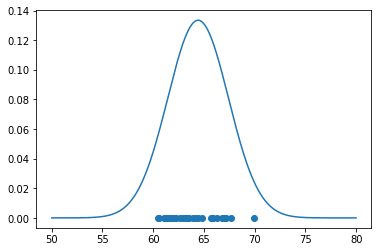

In [ ]:
# Plot between -50 and 80 with .01 steps.
x_axis = np.arange(50.0, 80.0, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, mean, standard_deviation))
plt.scatter(random_weights, [0 for _ in range(0,30)])
plt.show()

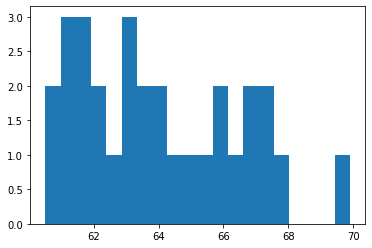

In [ ]:
# Plot a histogram to visualize distribution
bin_size=20
plt.hist(random_weights, bin_size)
plt.show()

We could do a number of things with this bell curve. We could create a simulation to generate hundreds of golden retrievers with realistic weights. If we were veterinarians, we could also use this bell curve to show patients and say, "Your golden retriever is on the far left side of the bell curve, so we need to help your dog gain some weight."

To really be productive with the normal distribution, you will have to learn about its cumulative distribution function to calculate areas/probabilities under it.

## [4. **Central Limit Theorem**](https://learning.oreilly.com/scenarios/statistics-for-data/9781098111168/)

The central limit theorem is a phenomenon where the normal distribution shows up when we take the means of samples, even if the underlying population does not follow a normal distribution.

This opens up a lot of useful concepts and gives license to many statistical tools. Even if the population you are studying does not follow a normal distribution, you can still infer parameters (like the population mean) by measuring its samples. This is a powerful idea and lays an important foundation for inferential statistics, including hypothesis testing.

One of the reasons the normal distribution is useful is because it appears a lot in nature, such as in adult golden retriever weights. It shows up in a much more fascinating context, however, outside natural populations. When we start measuring samples from a population, even if that population does not follow a normal distribution, the normal distribution still makes an appearance!

More specifically, the central limit theorem demonstrates that when means of samples are plotted, they will form a normal distribution. There is a bit more nuance to this that we will explore soon, but first let's do the following imports:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean

In the following script, you will read a single column of data (accessed at https://bit.ly/369dqlF). This data has no particular pattern and does not resemble a normal distribution at all.

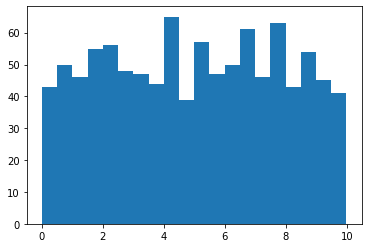

In [ ]:
points = pd.read_csv("https://bit.ly/369dqlF", header=None)

# Bring in data that does not fit normal distribution
x_values = [p for p in points[0]]

# Plot the data in histogram with bin range size of 20
plt.hist(x_values, 20)
plt.show()

Now, what happens when we group up samples and take the mean of each one?

We have purely random data. However something remarkable happens when you take random samples from this data, take the mean of each sample, and then plot them. It resembles a normal distribution! Let's append the following code:

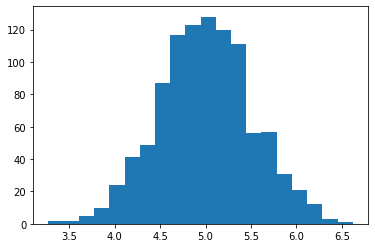

In [ ]:
# Randomly sample 1000 groups of 31 points and take their average
sample_size = 31

sample_avgs = [mean(random.choices(x_values, k=sample_size)) for _ in range(1000)]
plt.hist(sample_avgs, 20)

# Plot the sample means in histogram with bin range size of 20
plt.show()

This shows a phenomenon when taking samples from a population. Even if the population has no resemblance to the normal distribution, the means of its samples do. Well, there are a few conditions that need to be met for this to happen. Let's talk about those next.

You will see this normal distribution behavior if the sample size is at least 31, but as you make that sample size smaller, you will notice that the normal distribution diminishes. This is why we often resort to T-distributions rather than normal distributions for sample sizes less than 31 (which is beyond the scope of this scenario).

But this behavior is important because when we are doing studies about populations or testing a new drug, we do not have to fret about whether the population follows a normal distribution. If we are taking samples (which is almost always the case), whatever we are inferring is going to follow a normal distribution due to the central limit theorem.

Here are the important points about the central limit theorem. Note these carefully, because they are essential to many ideas in statistics and hypothesis testing:
1. The mean of the sample means is equal to the population mean.
2. If the population is normal, then the sample means will be normal.
3. If the population is not normal but the sample size is greater than 30, the sample means will still form a normal distribution!
4. The standard deviation of the sample means equals the population standard deviation divided by the square root of n.

## [5. **Confidence Intervals**](https://learning.oreilly.com/scenarios/statistics-for-data/9781098111175/)

A *confidence interval* is the probability that a population parameter, such as a mean, falls within a certain range based on a sample. Confidence intervals play a huge role in scientific research, engineering, and many other fields of study inside and outside of data science.

You may have heard the term confidence interval, which often confuses statistics newcomers and students. A confidence interval is a range calculation showing how confidently we believe a population mean (or other parameter) falls in a range based on a sample.

For example, let's say I have a sample of golden retriever weights, and I want to know with 95% confidence what range of weight values I can expect the population weight mean to fall in. That's essentially the idea of a confidence interval, and it is pretty useful to make claims about a population range based on a sample... but with a percent of confidence. If I have a confidence of 95%, there is, conversely, a 5% chance the population mean will not be in my sample's confidence interval at all.

Here's a more concrete example: based on a sample of 31 golden retrievers with a sample mean of 64.408 and a sample standard deviation of 2.05, I am 95% confident that the population mean lies between 63.686 and 65.1296.

In [ ]:
from math import sqrt
from scipy.stats import norm


def critical_z_value(p, mean=0.0, std=1.0):
    norm_dist = norm(loc=mean, scale=std)
    left_area = (1.0 - p) / 2.0
    right_area = 1.0 - ((1.0 - p) / 2.0)
    return norm_dist.ppf(left_area), norm_dist.ppf(right_area)

print("Critical range for .95 confidence: ")
print(critical_z_value(.95))

Critical range for .95 confidence: 
(-1.959963984540054, 1.959963984540054)


Note the critical_z_value() function. To be 95% confident that my sample mean lies in a range for the population mean, I need to find the area in the middle of the normal distribution that is .95. This will give me .025 area left in each tail. Using the range that gives me this area in the center, I will have the standard deviation value that, plus or minus (±), will provide me an area of .95. This is my critical z-value, and the critical_z_value() function returns the left and right of these boundaries.

The critical_z_value() function did most of the hard work. Now all I have to do is convert it back from a standard normal distribution scale (mean of 0 and standard deviation of 1) back into my golden retriever distribution scale (mean of 64.408 and standard deviation of 2.05). Using the central limit theorem, I can achieve this by multiplying the lower and upper boundaries of the critical value range by the sample standard deviation divided by the square root of the sample size n.

Now I can predict with 95% confidence what range the golden retriever population weight mean will be based on my sample.

In [ ]:
def confidence_interval(p, sample_mean, sample_std, n):
    # Sample size must be greater than 30

    lower, upper = critical_z_value(p)
    lower_ci = lower * (sample_std / sqrt(n))
    upper_ci = upper * (sample_std / sqrt(n))

    return sample_mean + lower_ci, sample_mean + upper_ci


# What is the confidence interval of my sample of 31 golden retrievers
# with sample mean of 65.13, sample std of 2.05?
print(confidence_interval(p=.95, sample_mean=64.408, sample_std=2.05, n=31))

(63.68635915701992, 65.12964084298008)


Running this, I find that the population mean lies between 63.686 and 65.1296 based on this sample with 95% confidence.



## [6. **P-values One-Tailed Test**](https://learning.oreilly.com/scenarios/statistics-for-data/9781098111182/)

Hypothesis testing plays a critical role in evaluating whether a finding is significant. We always have to entertain the possibility that our finding is coincidental, and the one-tailed and two-tailed tests help achieve this analysis.

When we say something is statistically significant, what do we mean by that?

It has something to do with a concept called the p-value, the probability something occurring by chance rather than because of a hypothesized explanation. This helps us frame our null hypothesis (H0), saying that the variable in question had no impact on the experiment and any positive result is just random luck. The alternative hypothesis (H1) poses that a variable in question (called the controlled variable) is the cause of a positive result.

Let's use one form of hypothesis testing, called the one-tailed test, to see if a new cold drug works. A one-tailed test structures null and alternative hypotheses in a "less than" or "greater than" fashion.

Let's code a hands-on example. Past studies have shown that the mean recovery time for a cold is 18 days, with a standard deviation of 1.5 days, and that it follows a normal distribution. Let's declare that with this code snippet and bring in an import we will use later:

In [ ]:
from scipy.stats import norm

# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5

Now let's say an experimental new drug was given to a test group of 40 people, and it took an average of 16 days for them to recover from the cold. Did the drug work? We need to recognize that this drug falls well outside that .05 tail, and traditionally the threshold for statistical significance is a p-value of 5% or less, or .05. In effect, for the drug to be considered working, the recovery time must be inside the left tail region.

In a one-tailed test, we typically frame our null (H0) and alternative (H1) hypotheses using inequalities. We structure the alternative hypothesis that the new mean is less than 18, and the null hypothesis has it greater than 18. The grey shaded area below is our p-value from this experiment, but the red area of .05 is the required p-value we need to be within to say the drug works.

Let's calculate that p-value now.

In [ ]:
# Probability of 16 or less days
p_value = norm.cdf(16, mean, std_dev)

print("1-tailed P-value: ", p_value) 
print("Required P-value: .05")

if p_value <= norm.ppf(.05):
    print("Passes 1-tailed test")
else:
    print("Fails 1-tailed test")

1-tailed P-value:  0.09121121972586788
Required P-value: .05
Fails 1-tailed test


Our p-value of .0912 is much greater than .05. So our drug has failed to be statistically significant, and we cannot say it worked.

## [7. **P-values Two-Tailed Test**](https://learning.oreilly.com/scenarios/statistics-for-data/9781098117030/)

Let's explore the two-tailed test in this scenario, which is often preferable in most experiments.

Let's use a form of hypothesis testing called the two-tailed test to see if a new cold drug works. A two-tailed test structures null and alternative hypotheses in an "equals" and "not equals" fashion.

Past studies have shown that the mean recovery time for a cold is 18 days, with a standard deviation of 1.5 days, and that it follows a normal distribution. Consider a critical Z-value for .95, where 95% of probability is between 15 and 21 days of recovery time.

An experimental new drug was given to a test group of 40 people and it took an average of 16 days for them to recover from the cold.

Did the drug work at 95% confidence? We need to recognize that this drug falls well inside this 95% critical Z range (the red area), and traditionally the threshold for statistical significance is a p-value of 5% or less, or .05 (tails outside the red area). In effect, for the drug to be considered working, the recovery time must be outside that shaded region where coincidence is a less likely explanation.

To do a two-tailed test, we frame our null and alternative hypothesis in an "equal" and "not equal" structure, as opposed to an inequality in a one-tailed test. In our drug test, we will say the null hypothesis H0 has a mean recovery time of 18 days. But our alternative hypothesis H1 is the mean recovery time is not 18 days thanks to the new drug.

This has an important implication. We are structuring our alternative hypothesis to not test whether the drug improves cold recovery time, but if it had any impact in increasing or decreasing the duration of the cold. We spread our p-value to both tails, not just one.

If we are testing for a statistical significance of 5%, then we split it and give each remaining 2.5% half to each tail. Here is how we calculate the area for the left tail.

In [ ]:
from scipy.stats import norm

# Cold has 18 day mean recovery, 1.5 std dev
mean = 18
std_dev = 1.5

# Probability of 16 or less days
p1 = norm.cdf(16, mean, std_dev)

Thanks to the symmetry of the normal distribution, we can simply calculate the boundary of the other tail as being equal. In a two-tailed test, the p-value is going to be the area of both tails.

In [ ]:
# Probability of 20 or more days
# Take advantage of symmetry
p2 = p1

# P-value of both tails
# I could have also just multiplied by 2 
p_value = p1 + p2

If our drug mean recovery time falls in either region below (in red) our test is successful and we reject the null hypothesis:

In [ ]:
print("2-tailed P-value", p_value)
print("Required P-value: .05")


if p_value <= .05:
    print("Passes 2-tailed test")
else:
    print("Fails 2-tailed test")

2-tailed P-value 0.18242243945173575
Required P-value: .05
Fails 2-tailed test


There is an 18.24% probability results were due to random luck, rather than because drug made an impact. This demonstrates that the two-tailed test is often preferable to the one-tailed test because it has a much higher threshold. Again, our p-value is .1824 so that definitely exceeds .05. Therefore we cannot conclude this drug works.

## [8. **Matrix Multiplication**](https://learning.oreilly.com/scenarios/linear-algebra-for/9781098118068/)

When we have multiple linear transformations performed on a vector space, we can effectively combine them into a single linear transformation. This is the idea behind matrix multiplication.

We use the dot product to perform this operation in libraries like NumPy, and along the way.

What does it mean when we apply a transformation to another transformation? This is essentially what matrix multiplication is, which is combining multiple linear transformations into a single linear transformation.

When we talk about matrix multiplication, we continue to extend our ideas about linear transformation, giving us another tool for manipulating data. This enables applications like solving systems of equations and machine learning.

While we could apply these linear transformations one at a time, we could combine them into a single transformation (note that the basis matrix has no effect as a transformation, as it's the linear algebra equivalent of multiplying by "1"). Just like there is a formula for matrix vector multiplication, there is also a formula for matrix multiplication.

Here is how we combine two different transformations/matrices (rotation and shear) into one combined transformation/matrix in NumPy:

In [ ]:
from numpy import array

# Transformation 1 - Rotate
i_hat1 = array([0, 1])
j_hat1 = array([-1, 0])
transform1 = array([i_hat1, j_hat1]).transpose()

# Transformation 2 - Shear
i_hat2 = array([1, 0])
j_hat2 = array([1, 1])
transform2 = array([i_hat2, j_hat2]).transpose()

# Combine Transformations
combined = transform2 @ transform1

print(combined)

[[ 1 -1]
 [ 1  0]]


Note above that I call the @ to multiply transform2 and tranform1 to effectively combine them. This means that I am applying transformation 2 (the shear) on transformation 1 (the rotation). Now consider this before moving on: does the order you apply the transformation matter?

Yes, The order you perform the dot product matters! Here is the Python code that performs the rotation followed by the shear:

In [ ]:
from numpy import array

# Transformation 1 - Rotate
i_hat1 = array([0, 1])
j_hat1 = array([-1, 0])
transform1 = array([i_hat1, j_hat1]).transpose()

# Transformation 2 - Shear
i_hat2 = array([1, 0])
j_hat2 = array([1, 1])
transform2 = array([i_hat2, j_hat2]).transpose()

# Combine Transformations
combined = transform1 @ transform2

print(combined)

[[ 0 -1]
 [ 1  1]]


If you have three or more dimensions, these rules still apply. You multiply and sum each respective row with each column between the two matrices, and the order you execute them will affect the result:

In [ ]:
from numpy import array

# Transformation A
i_hat1 = array([1, 0, -1])
j_hat1 = array([1, 1, 3])
k_hat1 = array([-1, 2, 3])
transformA = array([i_hat1, j_hat1, k_hat1]).transpose()

# Transformation B
i_hat2 = array([3, 2, 2])
j_hat2 = array([-4, 2, 9])
k_hat2 = array([2, 1, 4])
transformB = array([i_hat2, j_hat2, k_hat2]).transpose()

# Combine Transformations - A then B
a_then_b = transformB @ transformA 
print("A then B:")
print(a_then_b)

# Combine Transformations - B then A
b_then_a = transformA @ transformB
print("B then A:")
print(b_then_a)

A then B:
[[ 1  5 -5]
 [ 1  7  5]
 [-2 23 28]]
B then A:
[[  3 -11  -1]
 [  6  20   9]
 [  9  37  13]]


Why do we care about these kinds of properties with matrix multiplication? Again, if data is a series of vectors packaged into a matrix, we can iteratively transform that data, but all those transformations could be consolidated. While you may not think this abstractly in practice, when you import data from Pandas and Excel, it is good to be mindful of these behaviors as you dive deeper into machine learning and optimization algorithms.

## [9. **Determinants**](https://learning.oreilly.com/scenarios/linear-algebra-for/9781098118075/)

When we perform linear transformations, we sometimes “expand” or “squish” space, and the degree to which this happens can be helpful to know. This is what the determinant does, and is one of the most fundamental and useful tools in linear algebra. There may be times before where you're siting down to solve a problem like a system of equations and calculate the determinant to do various checks, such as for linear dependence.

Take the following linear transformation where we stretch i-hat by a scalar of 3 and j-hat by 2. Notice I sampled an area in yellow. What happened to that yellow area?

![1](https://user-images.githubusercontent.com/62965911/224316750-39e861a0-e82e-4ed4-9fa4-0feb9a0d64de.png)

If you study that yellow area and describe mathematically what happened in the transformation, you can visually see it increases by 6x. In other words, the area increases by a factor of 6. The factor reflecting how much the area increased/decreased in a transformation is known as the determinant.

The easiest way to calculate the determinant on a given matrix/transformation is to use NumPy's det() function from its linear algebra package. Here is the Python code to calculate the determinant for the preceding example:

In [ ]:
from numpy.linalg import det
from numpy import array

i_hat = array([3, 0])
j_hat = array([0, 2])

basis = array([i_hat, j_hat]).transpose()

determinant = det(basis)

print(determinant)

6.0


So why do we care about the determinant? Determinants describe how much a sampled area in a vector space changes in scale with linear transformations, and this can provide helpful information about the transformation. Especially in cases where the determinant becomes negative or 0, the determinant can provide useful insights, especially for problems in linear programming and optimization.

Using some basic geometry, you can infer that simple shears and rotations do not change the determinant, which will remain at 1.0 and reflect no change in area. The following is a visualization and code of a simple shear that should reflect no change in the determinant:

![2](https://user-images.githubusercontent.com/62965911/224316773-1463509b-86f6-4ee4-97a8-0128785d2606.png)

In [ ]:
from numpy.linalg import det
from numpy import array

i_hat = array([1, 0])
j_hat = array([1, 1])

basis = array([i_hat, j_hat]).transpose()

determinant = det(basis)

print(determinant)

1.0


However, scaling will increase or decrease the determinant, as that will increase/decrease the sampled area.

Determinants also apply to cases in more than two dimensions. We just think of it in terms of volume rather than an area (even for high-dimensional vector spaces). The following is a visualization of the determinant for a 3D vector space transformation:

![3](https://user-images.githubusercontent.com/62965911/224316782-8e8f7b49-41ae-4b1d-bbf2-35b7405027dd.png)

**Zero Determinants**

What does a determinant of 0 mean? This is actually an important check when dealing with systems of equations and other types of problems, because it indicates linear dependence.

Linear dependence means that the transformation puts two or more basis vectors on the same underlying line. In many situations, such as solving systems of equations, this creates complications, because we have compressed our space into fewer dimensions.

Take a look at the following linear transformation. Notice that i-hat and j-hat are now collinear, meaning they share the same straight line, making this transformation linearly dependent:

![4](https://user-images.githubusercontent.com/62965911/224316792-31b3966b-e399-477f-ba4e-7e8acbbb411d.png)

Here is the Python code with NumPy showing this zero determinant:

In [ ]:
from numpy.linalg import det
from numpy import array

i_hat = array([-1, 1])
j_hat = array([1, -1])

basis = array([i_hat, j_hat]).transpose()

determinant = det(basis)

print(determinant)

0.0


Another way to think of a zero determinant is that it squishes all of space into a lesser number of dimensions. This makes the transformation problematic for many reasons, as you are now limited to vectors in fewer dimensions.

**Negative Determinants**

Let's explore negative vectors and what they mean. Here is a visualization of a linear transformation that has a negative determinant. Any guesses on why that is?

![5](https://user-images.githubusercontent.com/62965911/224316796-f3b84493-e004-407f-9374-938af825e2e4.png)

Notice how i-hat and j-hat have flipped places in their clockwise positions. When the entire space "flips" and reverses its orientation, that will result in a negative determinant. Here is this negative determinant transformation in Python:

In [ ]:
from numpy.linalg import det
from numpy import array

i_hat = array([-2, 1])
j_hat = array([1, 2])

basis = array([i_hat, j_hat]).transpose()

determinant = det(basis)

print(determinant)

-5.000000000000001


So a determinant of -5.0 means not only that the area increased by a factor of 5, but it also flipped the space and resulted in a negative determinant.

If you need to visually see whether a 3D vector space would result in a negative determinant, use the right-hand rule as shown in the following. If you cannot relatively orient i-hat, j-hat, and k-hat like my hand here, the orientation has flipped, and you should have a negative determinant. Of course, NumPy can calculate and indicate this for you too by returning a negative determinant:

![6](https://user-images.githubusercontent.com/62965911/224316802-0cd9189d-3177-4ccc-93cf-fb21da6fd7bc.png)

In this example, you can see that with some rotation my labelled hand orients with the vector space above, so we can expect a positive determinant.

## [10. **Inverse Matrices**](https://learning.oreilly.com/scenarios/linear-algebra-for/9781098118082/)

Suppose you were asked to undo a linear transformation. How do you do it? The way you undo a linear transformation is with another linear transformation, one that does the opposite movement. This is actually what the inverse matrix does, and it has many use cases in solving systems of equations, linear programming, linear regression, and machine learning.

The most practical way to calculate an inverse matrix is to have NumPy to do it for you. Below, we use the inv() function from NumPy to calculate the inverse of matrix A:

In [ ]:
from numpy.linalg import inv
from numpy import array

i_hat = array([3, 0])
j_hat = array([0, 2])

A = array([i_hat, j_hat]).transpose()

# calculate inverse matrix
inverse = inv(A)
print(inverse)

[[0.33333333 0.        ]
 [0.         0.5       ]]


Calculating inverse matrices are a bit tedious to do by hand, and even computers can struggle to do it on large matrices. This is why techniques like matrix decomposition are used.

Let's now take this inverse matrix and apply it to the stretched matrix. When we apply it with the dot product, what happens?

In [ ]:
from numpy.linalg import inv
from numpy import array

i_hat = array([3, 0])
j_hat = array([0, 2])

A = array([i_hat, j_hat]).transpose()

# calculate inverse matrix
inverse = inv(A)

# apply inverse of A to matrix A
identity = inverse @ A 
print(identity)

[[1. 0.]
 [0. 1.]]


What happens is that we get our basis vectors back to their starting position, effectively undoing the transformation. This matrix where we have a nice diagonal of 1s from corner to corner (and surrounded by 0s) is known as an identity matrix. It effectively shows that no transformation has taken place, and is a key objective in many problems, such as systems of equations.

Now let's apply this knowledge to something slightly more useful. Lets start with a simple vector. Vector v was transformed by matrix A and now lands at [1 2]. What was it before the transformation?

We need to find another transformation that reverses this one, and see where v started, as visualized in the following:

![7](https://user-images.githubusercontent.com/62965911/224316834-599c4e09-6caa-4a18-8265-24bb2efcc7fe.png)

Again, we will use the inv() function in NumPy to find the inverse transformation, but this time we will apply it to vector v rather than matrix A:

In [ ]:
from numpy.linalg import inv
from numpy import array

new_v = array([1, 2])
i_hat = array([3, 0])
j_hat = array([0, 2])

A = array([i_hat, j_hat]).transpose()

# calculate inverse matrix
inverse = inv(A)

# calculate v before A transformation
old_v = inverse @ new_v
print(old_v)

[0.33333333 1.        ]


So our vector started at approximately [.333 1] (or [1/3 1], if you make it rational) before it was transformed.

Interesting, right? Inverse matrices are used in many applications from linear programming to linear regression and machine learning. In other scenarios, we will cover how to use them to solve system of equations, as well as linear regressions.

Keep in mind that calculating inverse matrices can be an increasingly computationally expensive operation as the matrix grows larger. This is one reason why matrix decomposition, which breaks a matrix up into simpler components, is used quite a bit in computer science. These simplified matrices derived off the larger matrix can then be used to efficiently do tasks like linear regression and principal component analysis.

## [11. **Matrix Decomposition**](https://learning.oreilly.com/scenarios/linear-algebra-for/9781098118105/)

As you go down the linear algebra rabbit hole, there will be situations in which you inevitably encounter the need for matrix decomposition. This is a process in which you break up a matrix into simpler matrices that are easier to interpret and/or use, depending on your task.

In this scenario, we will explore two matrix decomposition methods, QR decomposition and eigendecomposition, the latter of which creates the famous eigenvectors and eigenvalues.

Matrix decomposition, also called matrix factorization, is a process in which you break up a matrix into simpler components for a specific task. The need for this is primarily in circumstances where you run into the limitations that computers have. Computers, even as powerful as they are today, can choke on large complicated matrices full of high-dimensional data. With only so much memory and computational power, even tasks like inverse matrices, solving systems of equations, or calculating determinants can be taxing.

Much like how you cut food into small pieces for a small child, you can cut a matrix into smaller components so the computer can ingest it more easily.

Another way to think about matrix decomposition is by comparing it to number factoring, such as how the number 10 factors into 2 and 5. We are decomposing the matrix into something more basic, although what that looks like depends on the task.

Take, for example, QR Decomposition, which breaks up a matrix A (which can be square or non-square) into two matrices Q and R. When you dot-product Q and R together, it will rebuild matrix A.

QR decomposition is primarily used for solving systems of equations, least squares problems, as well as linear regression. These problems do not always require decomposition, but they do once they reach a certain scale.

In the following, we use QR decomposition to break up a matrix A, and then rebuild it again using the @ operator:

In [ ]:
from numpy import array
from numpy.linalg import qr

# define matrix
A = array([
[5, 2, 7],
[1, 7, 9]
])

# decompose
Q, R = qr(A)

print("Q:")
print(Q)
print("R:")
print(R)

# rebuild
B = Q @ R

print("Reconstructed:")
print(B)

Q:
[[-0.98058068 -0.19611614]
 [-0.19611614  0.98058068]]
R:
[[-5.09901951 -3.3339743  -8.62910995]
 [ 0.          6.47183246  7.45241314]]
Reconstructed:
[[5. 2. 7.]
 [1. 7. 9.]]


Eigendecomposition is another form of matrix decomposition that is often used for principal component analysis (PCA) in machine learning.

You might have heard the terms eigenvector and eigenvalues, which are both the components of eigendecomposition.

Without going deep into a rabbit hole, eigenvectors always have a length of 1.0, and eigenvalues are applied to the eigenvectors to scale their length. These two pieces of information provide some useful (if abstract) properties of the matrix.

There is one eigenvector and eigenvalue for each dimension of the parent matrix, and not all matrices can be decomposed into an eigenvector and eigenvalue. Sometimes complex (imaginary) numbers will result!

Here is eigendecomposition performed using NumPy, where matrix A is decomposed into the eigenvector and eigenvalue:

In [ ]:
from numpy import array, diag
from numpy.linalg import eig, inv

A = array([
    [1, 2],
    [4, 5]
])

eigenvals, eigenvecs = eig(A)

print("EIGENVALUES")
print(eigenvals)
print("\nEIGENVECTORS")
print(eigenvecs)

EIGENVALUES
[-0.46410162  6.46410162]

EIGENVECTORS
[[-0.80689822 -0.34372377]
 [ 0.59069049 -0.9390708 ]]


To rebuild a matrix from its eigenvectors and eigenvalues, we tweak our formula using some inverse matrix work:

$ A = Q \wedge Q^{-1} $

where,
- $ Q = \text{eigenvectors} $,
- $ \wedge = \text{eigenvalues in diagonal form} $,
- $ Q^{-1} = \text{inverse of matrix Q} $.

Here is how we apply the formula to rebuild the matrix. Note how we repackage our eigenvalues into a diagonal matrix, meaning we orient it diagonally and then pad it with 0s:

$
Q = \begin{bmatrix}
0.806 & 0.343 \\
0.590 & -0.939
\end{bmatrix}
$

$
\wedge = \begin{bmatrix}
-0.464 & 0 \\
0 & 6.464
\end{bmatrix}
$

$
Q^{-1} = \begin{bmatrix}
-0.977 & 0.357 \\
-0.614 & -0.839
\end{bmatrix}
$

$
A = Q \wedge Q^{-1} = \begin{bmatrix}
1 & 2 \\
4 & 5
\end{bmatrix}
$

And here is the rebuilding operation appended to our code using NumPy's @ multiplication operator. If you take a look at the following code, you will see it rebuilds the matrix from the eigenvectors and eigenvalues:

In [ ]:
from numpy import array, diag
from numpy.linalg import eig, inv

A = array([
    [1, 2],
    [4, 5]
])

eigenvals, eigenvecs = eig(A)

print("EIGENVALUES")
print(eigenvals)
print("\nEIGENVECTORS")
print(eigenvecs)

print("\nREBUILD MATRIX")
Q = eigenvecs
R = inv(Q)

L = diag(eigenvals)
B = Q @ L @ R

print(B)

EIGENVALUES
[-0.46410162  6.46410162]

EIGENVECTORS
[[-0.80689822 -0.34372377]
 [ 0.59069049 -0.9390708 ]]

REBUILD MATRIX
[[1. 2.]
 [4. 5.]]


There are many other matrix decomposition techniques that we did not cover, including LU decomposition, Cholesky decomposition, and the famous singular value decomposition (SVD). The last one, SVD, is used heavily for compressing and denoising data.

The best way to learn each of these is to apply them to the problems they were designed to solve.